In [ ]:
 !wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip


--2023-05-17 08:49:43--  https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip [following]
--2023-05-17 08:49:43--  https://raw.githubusercontent.com/michael-franke/npNLG/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31636302 (30M) [application/zip]
Saving to: ‘A3DS.zip’

A3DS.zip            100%[===================>]  30.17M   122MB/s    in 0.2s    

2023-05-17 08:49:44 (122 MB/s) - ‘A3DS.zip’ saved [3

In [ ]:
!unzip A3DS.zip

Archive:  A3DS.zip
   creating: A3DS/
  inflating: __MACOSX/._A3DS         
  inflating: A3DS/sandbox_3Dshapes_1000.pkl  
  inflating: __MACOSX/A3DS/._sandbox_3Dshapes_1000.pkl  
  inflating: A3DS/sandbox_3Dshapes_resnet50_features_1000.pt  
  inflating: __MACOSX/A3DS/._sandbox_3Dshapes_resnet50_features_1000.pt  
  inflating: A3DS/vocab.pkl          
  inflating: __MACOSX/A3DS/._vocab.pkl  
  inflating: A3DS/pretrained_decoder_3dshapes.pkl  
  inflating: __MACOSX/A3DS/._pretrained_decoder_3dshapes.pkl  
  inflating: A3DS/sandbox_IDs_3dshapes_1000.txt  
  inflating: __MACOSX/A3DS/._sandbox_IDs_3dshapes_1000.txt  


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.8 MB/s eta 0:00:00


In [ ]:

from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [ ]:
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

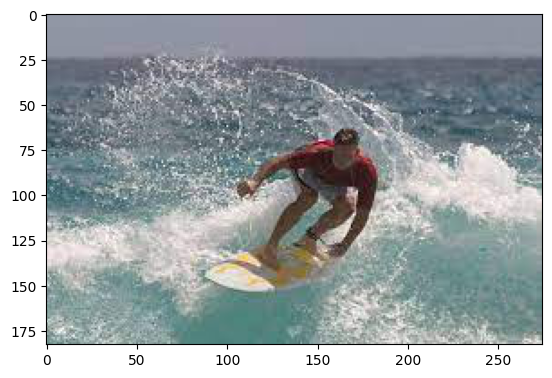

a man riding a wave on top of a board on a wave 


In [16]:
from PIL import Image

def show_n_generate(image_path, greedy=True, model=model_raw):
    image = Image.open(image_path)
    pixel_values = image_processor(image, return_tensors="pt").pixel_values
    plt.imshow(np.asarray(image))
    plt.show()

    if greedy:
        generated_ids = model.generate(pixel_values, max_new_tokens=30)
    else:
        generated_ids = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens=30,
            top_k=5)
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    print(generated_text)

image_path = "/content/download.jpeg"

show_n_generate(image_path, greedy=False)


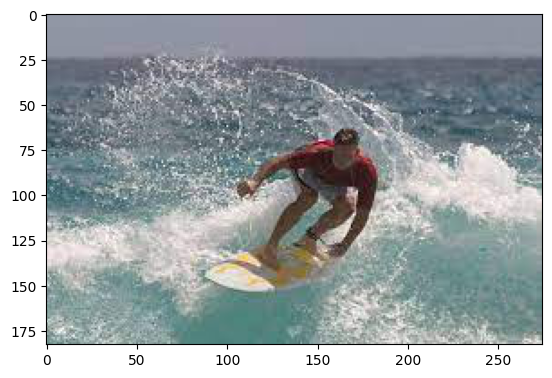

a man is in the water on a board 


In [1]:
#This line uses the wget command to download a zip file from the specified URL.
!wget https://github.com/michael-franke/npNLG/raw/main/neural_pragmatic_nlg/data/A3DS/A3DS.zip
#This line unzips the downloaded zip file, extracting its contents.
!unzip A3DS.zip
#This line installs the transformers library using pip.
!pip install transformers


#These lines import necessary libraries and modules required for the code.
from transformers import GPT2TokenizerFast, ViTImageProcessor, VisionEncoderDecoderModel
from torch.utils.data import Dataset
from torchtext.data import get_tokenizer
import requests
import torch
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

#This line ignores warning messages
import warnings
warnings.filterwarnings('ignore')

#This line loads the pretrained VisionEncoderDecoderModel from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
model_raw = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line loads the pretrained ViTImageProcessor from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line loads the pretrained GPT2TokenizerFast from the "nlpconnect/vit-gpt2-image-captioning" checkpoint.
tokenizer       = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

#This line imports the Image class from the PIL (Python Imaging Library) module, which provides functionalities for working with images.
from PIL import Image



def show_n_generate(image_path, greedy=True, model=model_raw): #This line defines a function named show_n_generate that takes three parameters: image_path (the path to the image file), greedy (a boolean flag indicating the decoding strategy), and model (the model used for generating captions).
    
    image = Image.open(image_path) #This line opens the image located at the specified image_path using the Image.open() function and assigns it to the variable image.
    
    pixel_values = image_processor(image, return_tensors="pt").pixel_values  #This line processes the image using an image_processor to obtain the pixel values. The return_tensors="pt" argument specifies that the pixel values should be returned as a PyTorch tensor. The resulting tensor is assigned to the variable pixel_values.
    
    plt.imshow(np.asarray(image)) #These lines display the image using imshow() from the pyplot module of matplotlib after converting it to a NumPy array using np.asarray(). 
    
    plt.show() #The show() function is then called to display the image in a separate window.
    

    #This code block generates caption IDs for the image. If greedy is True, 
    #the generate() function is called with the pixel_values and a maximum of 30 new tokens.
    # Otherwise, if greedy is False, the generate() function is called with additional arguments for sampling (do_sample=True),
    # a maximum of 30 new tokens, and a top-k value of 5.
    if greedy:
        generated_ids = model.generate(pixel_values, max_new_tokens=30)
    else:
        generated_ids = model.generate(
            pixel_values,
            do_sample=True,
            max_new_tokens=30,
            top_k=5)
        
    #This line decodes the generated caption IDs into text using the batch_decode() function of the tokenizer. The resulting text is assigned to the variable generated_text.
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    #This line prints the generated text caption to the console.
    print(generated_text)

#This line assigns the path of the image file to the image_path variable.
image_path = "/content/download.jpeg"

#This line calls the show_n_generate function with the specified image_path and sets the greedy flag to False, 
#indicating that non-greedy decoding should be used. This triggers the generation of captions for the image 
#prints the result.
show_n_generate(image_path, greedy=False)



# New Section